In [1]:
from imblearn.under_sampling import RandomUnderSampler
us = RandomUnderSampler(random_state=0)

In [2]:
# 进行随机下采样，并使用MLP分类
import scipy
import scipy.io as scio
import numpy as np
import os
# 读取训练和测试数据
data_root = '/data/file/classification_data/years/sum_2016/'
train_sumX_2016_norm = scio.loadmat(os.path.join(data_root, 'train_sumX_2016_norm.mat'))['X']
train_sumy_2016_label = scio.loadmat(os.path.join(data_root, 'train_sumy_2016_label.mat'))['y']

test_sumX_2016_norm = scio.loadmat(os.path.join(data_root, 'test_sumX_2016_norm.mat'))['X']
test_sumy_2016_label = scio.loadmat(os.path.join(data_root, 'test_sumy_2016_label.mat'))['y']


In [3]:
X_re, y_re = us.fit_resample(train_sumX_2016_norm, train_sumy_2016_label)
X_re
y_re = y_re.reshape(-1, 1)


In [4]:
from sklearn.metrics import balanced_accuracy_score

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_re, y_re)

DecisionTreeClassifier(random_state=0)

In [6]:
y_pred =  clf.predict(test_sumX_2016_norm)

In [7]:
clf.score(test_sumX_2016_norm, test_sumy_2016_label)

0.6071428571428571

In [8]:
balanced_accuracy_score(y_pred, test_sumy_2016_label)

0.6122994652406417

In [9]:
def get_roc(pos_prob,y_true):

    pos = y_true[y_true==1]  # 145
    neg = y_true[y_true==0]  # 855
    # [::-1]逆序切片
    threshold = np.sort(pos_prob)[::-1]  # 按预测为正的概率大小逆序排列
    y = y_true[pos_prob.argsort()[::-1]]

    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))  # 0.0011695906432748538
    y_step = 1/float(len(pos))  # 0.006896551724137931
    y_sum = 0
    for i in range(len(threshold)):  # 1000
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            y_sum += tpr             # fpr加一个样本，y_sum累计。计算面积
    return tpr_all,fpr_all,y_sum*x_step  # 获得总体TPR，FPR和相应的AUC

In [10]:
pos_prob = clf.predict_proba(test_sumX_2016_norm)[:, 1]

In [11]:
pos_prob

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0.])

In [12]:
tpr, fpr, auc = get_roc(pos_prob, test_sumy_2016_label)

In [13]:
auc

0.47640306122448967

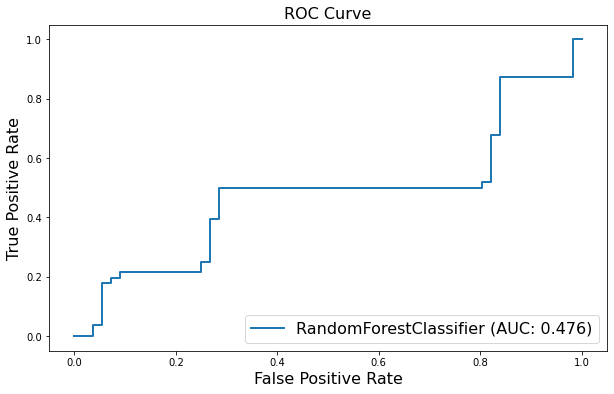

In [15]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="RandomForestClassifier (AUC: {:.3f})".format(auc),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)
plt.show()